# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
# check the data types 
ames.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [4]:
# feature selection of specific columns for our models , and make a copy
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

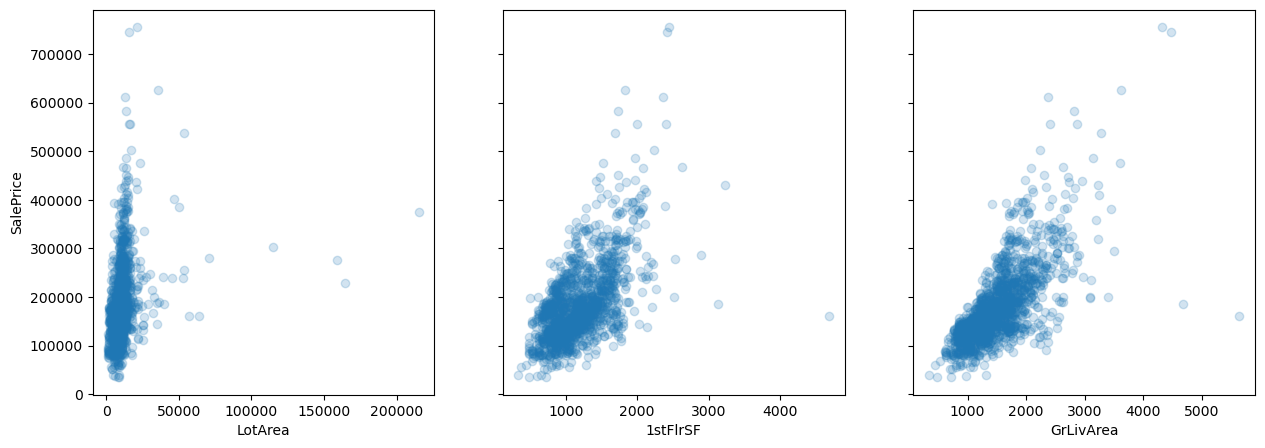

In [5]:
# Your code here - import relevant library, create scatter plots
import pandas as pd
import matplotlib.pyplot as plt 

# creating the visuals 
fig, axes = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
axes[0].set_ylabel("SalePrice")

for i, col in enumerate(ames_subset.drop("SalePrice", axis=1).columns):
    ax = axes[i]
    ax.scatter(ames_subset[col], ames_subset["SalePrice"], alpha=0.2)
    ax.set_xlabel(col)

##### 
1. All of these features seem to have a linear relationship with the SalePrice variable
2. They all contain few otliers , which could skew the results 

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [6]:
# Your code here - define y and baseline X

# defining the independent dependent variables 
X = ames_subset["LotArea"]
Y = ames_subset["SalePrice"]

In [7]:
# Your code here - import StatsModels, fit baseline model, display results

# import the statsmodels
import statsmodels.api as sm

# add a constant on the independent variable
X = sm.add_constant(X)
#Initiate the model Using sm.OLS
model = sm.OLS(Y,X)
# fit the model 
results=model.fit()
# display the results 

# print out the model outputs
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           1.12e-24
Time:                        10:58:42   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

In [8]:
# Your written answer here - interpret model results


#Metric	Value	Interpretation
# R-squared	0.070	Only 7% of the variation in SalePrice is explained by LotArea. This is quite low, suggesting a weak linear relationship.
# Adjusted R-squared	0.069	Similar to R², adjusted for number of predictors. Still weak.
# F-statistic	109.1	Indicates the model is statistically significant overall.
# Prob (F-statistic)	1.12e-24	Very small p-value → the relationship is statistically significant, even if weak.

# For every additional square foot of lot area, the model predicts an increase of $2.10 in sale price.

# The coefficient is statistically significant (p < 0.001), but the effect size is small and the overall explanatory power is weak.

#### Build a linear regression using GrLivArea as the independent variable

In [9]:
# identify the independent and dependent variables
X_2 = ames_subset["GrLivArea"]
Y_2 = ames_subset["SalePrice"]
# imports the statsmodels
import statsmodels.api as sm 
# add the intercept to the independent variable
X_2 = sm.add_constant(X_2)
# Initiate the model using sm.OLS and fit the model
lin_model = sm.OLS(Y_2,X_2).fit()
# print out the results
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          4.52e-223
Time:                        10:58:43   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

##### Interpretation 
1. The model is statistically Significant . It explains about 50%  of variance in Saleprice
2. Both the constant and the coefficient for GrLivArea are statistically significant , they are are 0.00 which is < 0.05
3. The intercept is about 18,600 , meaning a home with 0 squared feet above the ground , Living area would cost about 18.6K
4.  Our coefficient for GrLivArea is about 107, which means that for each additional square
foot of above ground living area, we expect the price to increase about $107

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [10]:
# Your code here - define X

# define the independent and dependent variables 
Y_3 = ames_subset["SalePrice"]
# define the x variable(independent variable excluding the target variable)
X_3 = ames_subset.drop("SalePrice",axis=1)

In [11]:
# Your code here - fit model and display results

# add a constant to the independent variable
X_3 = sm.add_constant(X_3)
# Initiate a multiple regression and fit the model
multiple_linreg_model = sm.OLS(Y_3,X_3).fit()
# print the model outputs 
print(multiple_linreg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          1.57e-262
Time:                        10:58:43   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

##### interpretation
1. The model is Statistically Significant with about 57% of variance in the SalePrice . This is 7% more of variation with the Linear regression
2. “Homes with larger above-ground living areas and first-floor square footage tend to command higher prices, with GrLivArea being the most impactful. Lot size has a weaker and borderline-significant effect.”

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

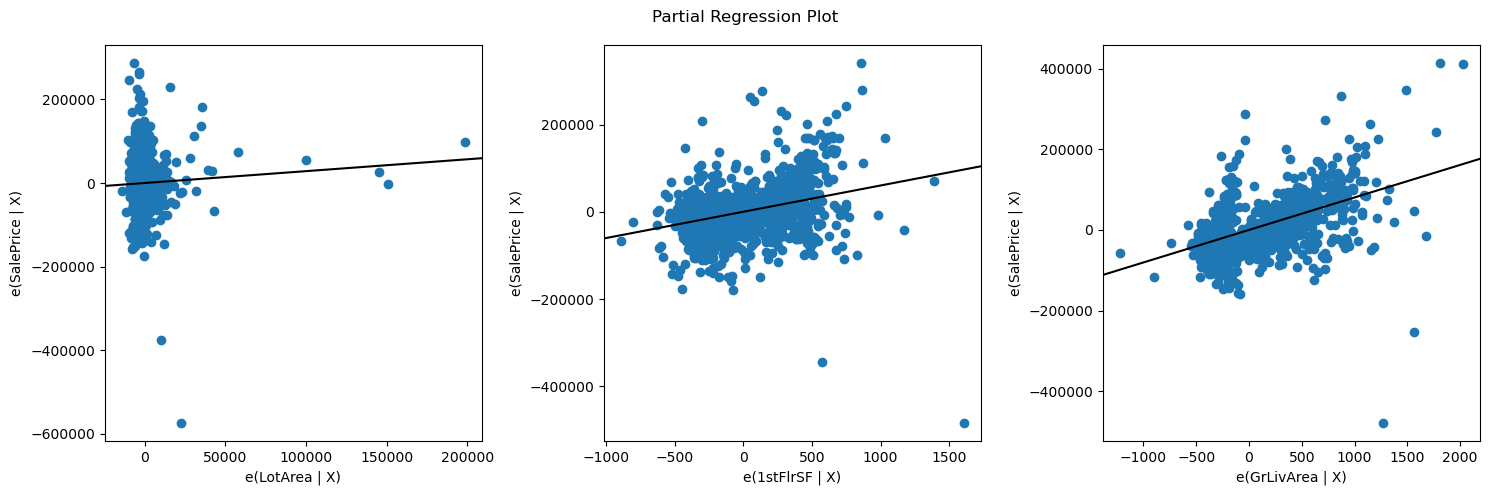

In [12]:
# Your code here - create partial regression plots for each predictor
import statsmodels.graphics.regressionplots as sm_graph

fig = plt.figure(figsize=(15,5))
# Use only the actual predictors (exclude 'const')
predictor_names = ["LotArea", "1stFlrSF", "GrLivArea"]
# Generate partial regression plots
sm.graphics.plot_partregress_grid(
    multiple_linreg_model,
    exog_idx=predictor_names,
    grid=(1,3),
    fig=fig)
plt.tight_layout()
plt.show()

In [13]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [19]:
# Your code here - import linear regression from scikit-learn and create and fit model
# import the libraries 
import pandas as pd 
from sklearn.linear_model import LinearRegression

# identify the dependent variable
Y_4 = ames_subset["SalePrice"]
# identify the independent variable (excluding the dependent variable)
X_4 = ames_subset.drop("SalePrice",axis=1)
# create and fit the model
reg_model = LinearRegression()
# fit the model
reg_model.fit(X_4,Y_4)
# Examine the models coefficient and R-squared
slope = reg_model.coef_[0]
intercept = reg_model.intercept_
r_squared = reg_model.score(X_4,Y_4)

print(f"slope (coefficient):{slope:.2f}")
print(f"Y-intercept:{intercept:.2f}")
print(f"R-squared:{r_squared:.4f}")

slope (coefficient):0.28
Y-intercept:-14313.41
R-squared:0.5650


##### 
1. Slope (Coefficient): 0.28 This means that for every one-unit increase in the first feature (likely LotArea, if you're using the default column order), the predicted SalePrice increases by approximately $280. If you're using multiple predictors, this is just the first coefficient—each feature has its own slope.

2. Y-intercept: -14,313.41 When all predictors are zero (which may not be realistic for housing data), the model predicts a negative sale price. This isn’t uncommon in linear models—it just means the intercept isn’t meaningful on its own, especially if zero isn’t in the range of your predictors.

3. R-squared: 0.5650 Your model explains 56.5% of the variance in housing prices. That’s a solid start! It suggests your predictors have decent explanatory power, but there’s still room to capture more variability—possibly with nonlinear features, interactions, or additional variables.

In [16]:
# Your code here - compare intercept and coefficients

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.